# A/B Testing Case Study

Marketing A/B testing dataset
Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

Would the campaign be successful?
If the campaign was successful, how much of that success could be attributed to the ads?
With the second question in mind, we normally do an A/B test. The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.

Data dictionary:

Index: Row index
user id: User ID (unique)
test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
converted: If a person bought the product then True, else is False
total ads: Amount of ads seen by person
most ads day: Day that the person saw the biggest amount of ads
most ads hour: Hour of day that the person saw the biggest amount of ads

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency, ttest_ind

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("marketing_AB.csv")

In [4]:
df

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [5]:
df.columns

Index(['Unnamed: 0', 'user id', 'test group', 'converted', 'total ads',
       'most ads day', 'most ads hour'],
      dtype='object')

In [6]:
df.nunique()

Unnamed: 0       588101
user id          588101
test group            2
converted             2
total ads           807
most ads day          7
most ads hour        24
dtype: int64

In [7]:
df = df.drop(columns=['Unnamed: 0']) 

In [8]:
df

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...
588096,1278437,ad,False,1,Tuesday,23
588097,1327975,ad,False,1,Tuesday,23
588098,1038442,ad,False,3,Tuesday,23
588099,1496395,ad,False,1,Tuesday,23


In [9]:
print(df['test group'].unique())

['ad' 'psa']


preprocess data

In [10]:
df['converted'] = df['converted'].astype(int)  
df['most ads day'] = df['most ads day'].astype('category')  

EDA

Conversion Rates by Group:
 test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64


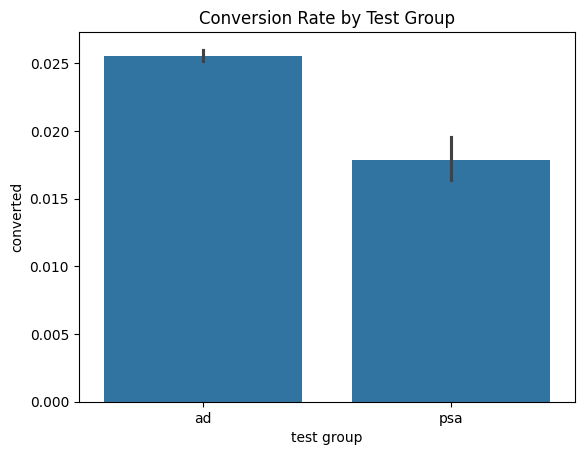

In [11]:
# Conversion rate by group
group_conversion = df.groupby('test group')['converted'].mean()
print("Conversion Rates by Group:\n", group_conversion)

# Visualize conversion rates
sns.barplot(x='test group', y='converted', data=df)
plt.title('Conversion Rate by Test Group')
plt.show()

Average Total Ads by Group:
 test group
ad     24.823365
psa    24.761138
Name: total ads, dtype: float64


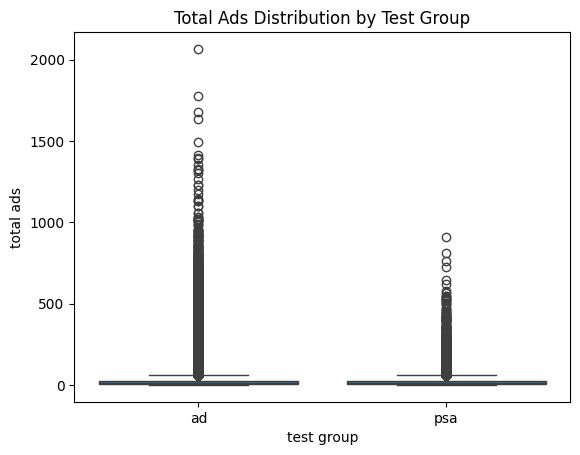

In [12]:
# Ads analysis
ads_stats = df.groupby('test group')['total ads'].mean()
print("Average Total Ads by Group:\n", ads_stats)

# Visualize ads distribution
sns.boxplot(x='test group', y='total ads', data=df)
plt.title('Total Ads Distribution by Test Group')
plt.show()

Hypothesis Testing

In [13]:
# Chi-Square Test for conversion rates
contingency_table = pd.crosstab(df['test group'], df['converted'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test p-value: {p}")

Chi-Square Test p-value: 1.9989623063390075e-13


In [14]:
# T-Test for total ads
test_group_ads = df[df['test group'] == 'ad']['total ads']
control_group_ads = df[df['test group'] == 'control']['total ads'] if 'control' in df['test group'].values else pd.Series()
if not control_group_ads.empty:
    t_stat, p_value = ttest_ind(test_group_ads, control_group_ads)
    print(f"T-Test p-value: {p_value}")
else:
    print("Control group data not available for T-Test.")

Control group data not available for T-Test.


Insights

In [15]:
if p < 0.05:
    print("Significant difference in conversion rates (Chi-Square Test).")
else:
    print("No significant difference in conversion rates.")

Significant difference in conversion rates (Chi-Square Test).


1. Segmentation Analysis

In [16]:
# Conversion rate by day of the week
day_conversion = df.groupby('most ads day')['converted'].mean()
print("Conversion Rate by Day of the Week:\n", day_conversion)

Conversion Rate by Day of the Week:
 most ads day
Friday       0.022212
Monday       0.032812
Saturday     0.021051
Sunday       0.024476
Thursday     0.021571
Tuesday      0.029840
Wednesday    0.024942
Name: converted, dtype: float64


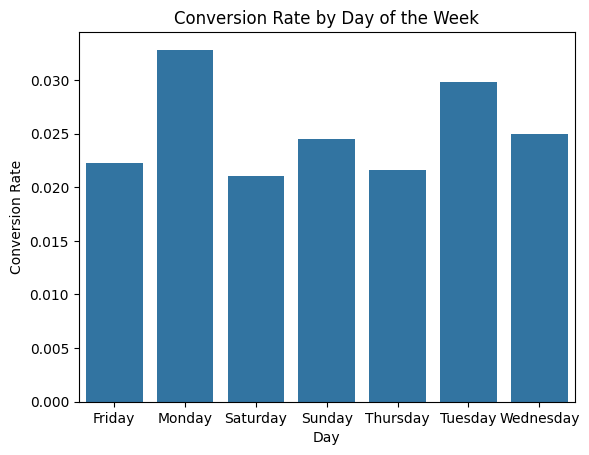

In [19]:
# Visualize day-based conversion rates
sns.barplot(x=day_conversion.index, y=day_conversion.values)
plt.title('Conversion Rate by Day of the Week')
plt.ylabel('Conversion Rate')
plt.xlabel('Day')
plt.show()

In [17]:
# Conversion rate by hour of the day
hour_conversion = df.groupby('most ads hour')['converted'].mean()
print("Conversion Rate by Hour of the Day:\n", hour_conversion)

Conversion Rate by Hour of the Day:
 most ads hour
0     0.018425
1     0.012911
2     0.007313
3     0.010452
4     0.015235
5     0.020915
6     0.022244
7     0.018111
8     0.019516
9     0.019191
10    0.021521
11    0.022116
12    0.023828
13    0.024677
14    0.028063
15    0.029653
16    0.030772
17    0.028210
18    0.027380
19    0.026720
20    0.029803
21    0.028923
22    0.026105
23    0.022662
Name: converted, dtype: float64


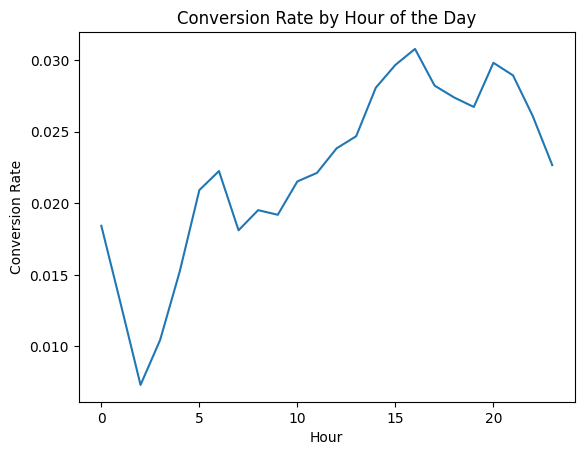

In [18]:
# Visualize hour-based conversion rates
sns.lineplot(x=hour_conversion.index, y=hour_conversion.values)
plt.title('Conversion Rate by Hour of the Day')
plt.ylabel('Conversion Rate')
plt.xlabel('Hour')
plt.show()

2. Predictive Modeling

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Prepare data for modeling
X = df[['total ads', 'most ads day', 'most ads hour']]
X = pd.get_dummies(X, columns=['most ads day'], drop_first=True)  # One-hot encode categorical column
y = df['converted']

In [21]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    171970
           1       0.18      0.05      0.08      4461

    accuracy                           0.97    176431
   macro avg       0.58      0.52      0.53    176431
weighted avg       0.96      0.97      0.96    176431

ROC AUC Score: 0.6673114131079384


3. Interaction Effects

In [22]:
import statsmodels.api as sm

# Interaction terms
df['ads_hour_interaction'] = df['total ads'] * df['most ads hour']

# Logistic regression model
X = df[['total ads', 'most ads hour', 'ads_hour_interaction']]
X = sm.add_constant(X)  # Add constant for intercept
y = df['converted']

model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.108568
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               588101
Model:                          Logit   Df Residuals:                   588097
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                 0.07822
Time:                        21:28:07   Log-Likelihood:                -63849.
converged:                       True   LL-Null:                       -69267.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.3033      0.033   -130.636      0.000      -4.368      -4.239

4. Incrementality Testing

In [23]:
# Calculate incremental lift
incremental_lift = group_conversion['ad'] - group_conversion['psa']
print(f"Incremental Lift: {incremental_lift:.2%}")

Incremental Lift: 0.77%
